# Анализ игр

**Содержание**



**[1. Обзор данных](#1)**

**[Общие выводы по качеству имеющихся данных](#1f)**



**[2. Подготовка данных](#2)**

**[2.1. Замена названий столбцов](#2.1)**

**[2.2. Обработка некорректных значеней в столбце User_Score](#2.2)**

**[2.3. Обработка пропуски](#2.3)**

**[2.4. Приведение данных к нужным типам](#2.4)**

**[2.5. Подсчет суммарных продаж по всем регионам](#2.5)**

**[Общие выводы по подготовке данных](#2f)**



**[3. Исследовательский анализ](#3)**

**[3.1. Анализ игр](#3.1)**

**[3.2. Анализ платформ](#3.2)**

**[3.3. Определение глубины ретроспективного периода](#3.3)**

**[3.4. Анализ динамики продаж](#3.4)**

**[3.5. Анализ влияния оценок](#3.5)**

**[3.6. Анализ жанров](#3.6)**

**[Общие выводы по исследовательскому анализу](#3f)**



**[4. Составление портрета пользователя каждого региона](#4)**

**[4.1. Определение пяти наиболее продаваемых платформ и жанров в разрезе по регионам](#4.1)**

**[4.2. Определение продаваемости игр каждой возрастной категории по регионам](#4.2)**

**[4.3. Определение пяти наиболее продаваемых платформ и жанров в разрезе по регионам для каждой возрастной категории](#4.3)**

**[4.4. Выявление влияния рейтинга ESRB на продажи в каждом регионе](#4.4)**

**[Общие выводы по составлению портрета пользователя](#4f)**



**[5. Проверка гипотез](#5)**

**[5.1. Проверка гипотезы о сопоставимости средних пользовательских рейтингов платформ XOne и PC](#5.1)**

**[5.2. Проверка гипотезы о сопоставимости средних пользовательских рейтингов жанров Action и Sports](#5.2)**

**[Общие выводы по проверке гипотез](#5f)**



**[6. Общие выводы](#6)**

**Заказчик** — интернет-магазин «Стримчик» (продаёт компьютерных игр по всему миру)

**Цель Заказчика.** Выявление закономерностей, определяющих успешность игры для планирования рекламных кампаний

**Цель исследования.** Выявить потенциально популярный продукт.

**Задачи**
- Определить динамику выпуска игр по годам. Уточнить глубину ретроспективного периода
- Выявить динамику изменения продаж по платформам. Определить платформы с наибольшими суммарными продажами, построить их распределение по годам. Уточнить характерный срок появления новых и исчезновения старых платформ
- Сформировать ретроспективный ряд (по ранее определенной глубине), достаточный для построения прогноза на 2017 год
- Выявить лидирующие по продажам платформы. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам
- Выявить зависимость влияния отзывов пользователей на продажи внутри одной популярной платформы. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Соотнести выводы с продажами игр на других платформах
- Обозначить общее распределение игр по жанрам. Выявить наиболее прибыльные жанры
- Составить портрет пользователя каждого региона определив пристрастия возрстных категорий к платформам и жанрам
- Проверить гипотезу о сопоставимости средних пользовательских рейтингов платформ Xbox One и PC
- Проверить гипотезу о сопоставимости средних пользовательских рейтингов жанров Action и Sports

**Входные данные от Заказчика.** Файл в формате .csv со статистикой о о продажах игр.

**Ожидаемый результат.** Выявлены закономерности, определяющих успешность игры и определен потенциально популярный продукт


## Обзор данных <a id='1'></a>

1. Открыть таблицу 
2. Изучить структуру данных по пяти первым строкам
3. Проверить уникальность данных
4. Изучить структуру данных методом `info()`

**Описание данных**

**Таблица `games`**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB

*Данные за 2016 год могут быть неполными*

In [1]:
# Импотрт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# Прочитаем файл
df = pd.read_csv('/datasets/games.csv')
display(df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# Проверим уникальность платформ
df['Platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [4]:
# Проверим уникальность жанров
df['Genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [5]:
# Проверим уникальность оценок пользователей
df['User_Score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [6]:
# Проверим уникальность рейтинга ESRB
df['Rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [7]:
# Проверим присутсвие явных дубликатов
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Общие выводы по качеству имеющихся данных <a id='1f'></a>

Предоставлена таблица `games`

1. Таблица содержит 10 столбцов и 16 715 строк
2. Заголовки столбцов не корректны и требуют замены регистра
3. Столбцы `Name`, `Year_of_Release`, `Genre` содержат незначительное количество пропусков, которые не могут быть заменены. Строки с пропусками в данных столбцах должны быть удалены
4. Столбцы `Critic_Score`, `User_Score` содержат значимое количество пропусков, которые нельзя ни чем заменить. Эти строки не будут учитываться при анализе влияния оценок. Удалять их нет необходимости
5. Столбец `Rating` содержит значимое значение `K-A`, которое было в 1998 году заменено на `E`. Еого надо заменить. Кроме того, столбец содержит большое количество пропусков, что говорит об отсутствии рейтинга. Эти значения надо заменить на `not`
6. В столбцах `Year_of_Release` и `User_Score` не корректный тип данных. Необходимо `Year_of_Release` заменить на `int`, а `User_Score` заменить на `float`
7. В столбцах явных и неявных дубликатов нет
8. Столбц `User_Score` содержит некорректное занчение `tbd`

## Подготовка данных <a id='2'></a>

1. Заменить названия столбцов
2. Обработать некорректное значение в столбце `User_Score`
3. Обработать пропуски
4. Привести данные к нужным типам
5. Посчитать суммарные продажи по всем регионам

### Замена названий столбцов <a id='2.1'></a>

In [9]:
# Приведем названия столбцов к нижнему регистру
df.columns=['name', 
            'platform', 
            'year_of_release', 
            'genre',
            'na_sales', 
            'eu_sales', 
            'jp_sales', 
            'other_sales', 
            'critic_score', 
            'user_score', 
            'rating'
]

### Обработка некорректных значеней в столбце User_Score <a id='2.2'></a>

In [10]:
# Определим коичество некорректных значений
df.loc[df['user_score'] == 'tbd'].shape

(2424, 11)

Столбец `user_score` содержит значения `tbd` в 2424 строках. **"To be determined"** определяется как **"будет определено позже"**. Следовательно, пользователь еще не определился с оценкой игры. Установим `None`

In [11]:
# Заменим в столбце user_score значение tbd на None
df.loc[(df['user_score'] == 'tbd'), 'user_score'] = None

### Обработка пропуски <a id='2.3'></a>

In [12]:
# Удалим пропуски по стобцам name, year_of_release, genre
df = df.dropna(subset=['name', 'year_of_release', 'genre'])

# Пропуски столбца 'Rating' заменим на 0
df['rating'] = df['rating'].fillna(0)

# В столбце 'Rating' нулевые значения замененим на `not`
df.loc[df['rating'] == 0, 'rating'] = 'not'

# В столбце 'Rating' значение 'K-A' замененим на 'E'
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

# Проверим результат методом isna
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

### Приведение данных к нужным типам <a id='2.4'></a>

Для упрощения работы с параметром `year_of_release` необходимо привести его значения к цельно численному типу. Работа с параметром `user_score` будет возможна при переводе его в числовой формат. Поскольку это параметр имеет дробные значения, то необходимо привести к типу `float`

In [13]:
# В столбце year_of_release установим тип данных int
df['year_of_release'] = df['year_of_release'].astype('int')

# В столбце user_score установим тип данных float
df['user_score'] = df['user_score'].astype('float')

# Проверим результат методом info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Подсчет суммарных продаж по всем регионам <a id='2.5'></a>

In [14]:
# Создадим новый столбец all_sales, в котором суммируем продажи всех регионов
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,not,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,not,31.38


### Общие выводы по подготовке данных <a id='2f'></a>

В процессе предобработки данных, названия столбцов приведены к нижнему регистру

Выявлено, что столбец `user_score` содержит значения `tbd` в 2424 строках. `tbd`   означает "To be determined", что идентифицируется как "будет определено позже". Следовательно, пользователь еще не определился с оценкой игры. Таким образом, принято решение о том, корректной заменой будет медианное значение. В результате в столбце `user_score` значение `tbd` заменено на медианное

Удалены пропуски по столбцам `name`, `year_of_release`, `genre`

В столбце `Rating` значение `K-A` замененим на `E`, а нулевые значения замененим на `not`

Для упрощения работы с параметром `year_of_release` его значения приведены к цельно численному типу. Значения параметра `user_score` привелениы к числовому формату типа `float`. 

Создан новый столбец `all_sales`, в котором суммированы продажи всех регионов

## Исследовательский анализ <a id='3'></a>

1. Анализ игр
    - Определить количество выпущенных игр по годам. 
    - Определить глубину ретроспективного периода для последующего анализа


2. Анализ платформ
    - Определить объем продаж по платформам. 
    - Выделить платформы с наибольшими суммарными продажами, построить их распределение по годам. 
    - Найти характерный срок появления новых и исчезновения старых платформ


3. Определение глубины ретроспективного периода
    - Сформировать ретроспективный ряд (по ранее определенной глубине), достаточный для построения прогноза на 2017 год


4. Анализ динамики продаж
    - Выявить лидирующие по продажам платформы. 
    - Определить динамику продаж платформ по годам. 
    - Выявить потенциально прибыльные платформы. 
    - Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам


5. Анализ влияния оценок
    - Выявить зависимость влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы. 
    - Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. 
    - Соотнести выводы с продажами игр на других платформах


6. Анализ жанров
    - Обозначить общее распределение игр по жанрам. 
    - Выявить наиболее прибыльные жанры. 
    - Соотнести популярность жанров с их продажами

### Анализ игр <a id='3.1'></a>

- Определить количество выпущенных игр по годам.
- Определить глубину ретроспективного периода для последующего анализа

In [15]:
# Определим количество выпущенных игр по годам
df_year = df.pivot_table(index='name', columns='year_of_release', values='genre', aggfunc='count')
display(df_year.head())

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
name,,,,,,,,,,,,,,,,,,,,,
Beyblade Burst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Fire Emblem Fates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Frozen: Olaf's Quest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
Haikyu!! Cross Team Match!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Tales of Xillia 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


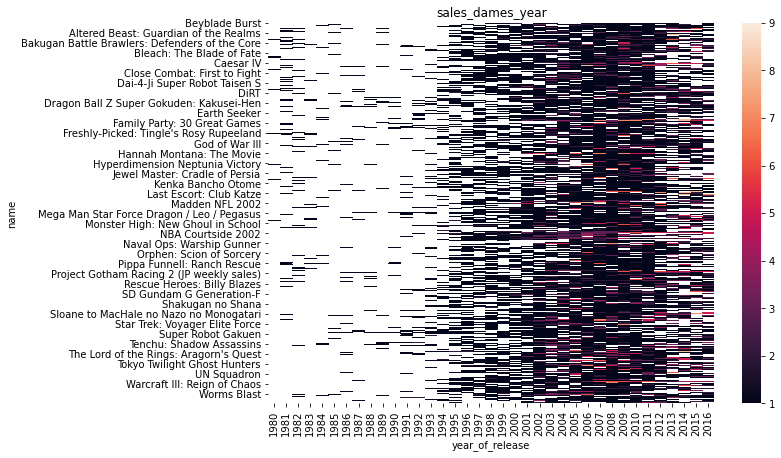

In [16]:
# Постороим тепловую карту
plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(df_year)
heatmap.set_title('sales_dames_year')
plt.show()

Постороим график выпуска игр в количестве по годам (без учета платформ)

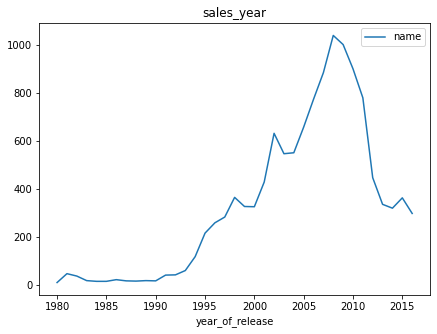

In [17]:
# Подготовим таблицу
df_year_game = df.loc[:, ['name', 'year_of_release']]
df_year_game = df_year_game.drop_duplicates().reset_index(drop=True)

# Проведем группировку
df_year_game_all = df_year_game.pivot_table(index='year_of_release', values='name', aggfunc='count')

# Постороим график количества игр
df_year_game_all.plot(figsize=(7, 5), title='sales_year')
plt.show()

In [18]:
# Вычимслим долю от всего числа игр в самые активные годы
df_year_game_all['all'] = df_year_game_all['name'].sum()
df_year_game_all['perc_all'] = (df_year_game_all['name'] / df_year_game_all['all']) * 100
print('С 2002 по 2011 выпущено ', int(df_year_game_all.loc[2002:2011, 'perc_all'].sum()), '% от всех игр')

С 2002 по 2011 выпущено  63 % от всех игр


Проведенный анализ общих продаж платформ показывает, что наибольшие продажи происходили в период **с 2002 по 2011 годы**. Этот период и будет наиболее удачным для прогнозирования

### Анализ платформ <a id='3.2'></a>

- Определить объем продаж по платформам.
- Выделить платформы с наибольшими суммарными продажами, построить их распределение по годам.
- Найти характерный срок появления новых и исчезновения старых платформ

In [19]:
#Определим объем продаж по платформам
df_platform = df.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
display(df_platform)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_sales, dtype: float64

In [20]:
# Платформы с наибольшими суммарными продажами: PS2, X360, PS3, Wii, DS, PS
# построить распределение их продаж по годам

# Создадим список наиболее продаваемых платформ
platform_top = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

# Сделаем срез данных методом query
df_platform_top = df.query('platform in @platform_top')

# Сформируем сводную таблицу
df_platform_top_pivot = df_platform_top.pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum')
display(df_platform_top_pivot)

year_of_release,1985,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
DS,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
PS,NaN,6.03,35.96,94.7,136.17,169.49,144.53,96.37,35.59,6.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.17,166.43,205.38,...,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52


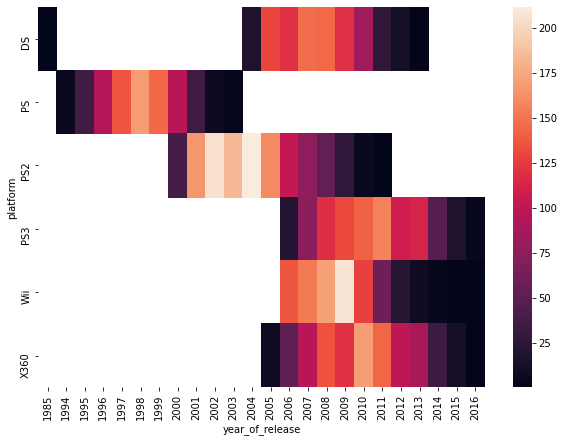

In [21]:
# Построим тепловую карту
plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(df_platform_top_pivot)
heatmap.set_title=('platform_top')
plt.show()

Срок жизни платформы - от 10 до 12 лет

Максимальных продаж как правило достигает на 3-й год и держит этот уровень от 3 до 5 лет

Указанный ранее интервал с 2002 по 2011 гг., говорит о пересечение в это период пиковых продаж нескольких платформ. 

Однако, для прогнозирования продаж на 2017 год необходимо учесть и последние годы. Поскольку, 2016 год еще не имеет полных данных о продажах, то для прогноза возьмем период **с 2002 по 2015 годы**

**Уточним глубину ретроспективного периода**

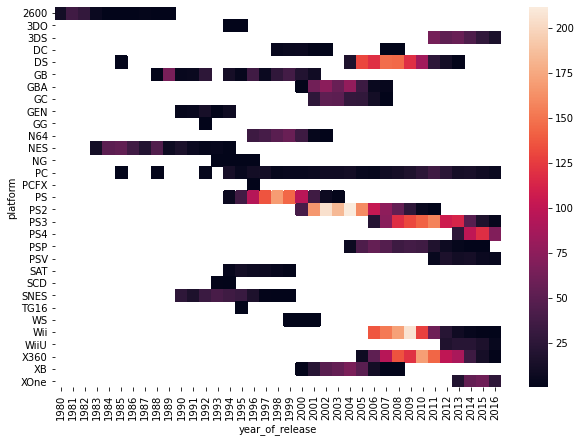

In [22]:
# Сводная табюлица по всем платформам
df_platform_all_pivot = df.pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum')

# Построим тепловую карту
plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(df_platform_all_pivot)
heatmap.set_title=('platform_all')
plt.show()

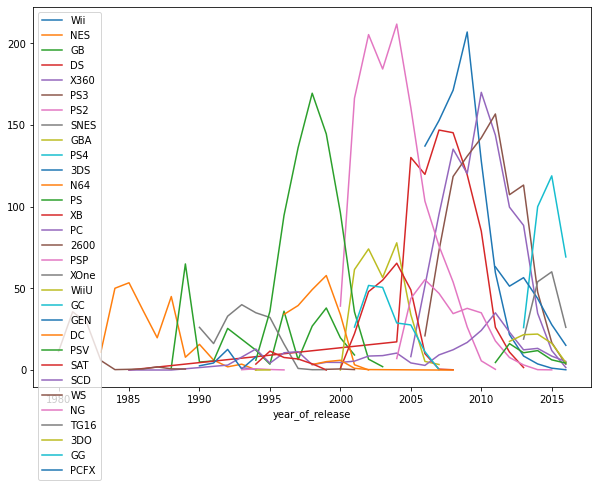

In [23]:
# График продаж
platform_list = df['platform'].unique()
for i in platform_list:
    df.loc[df['platform'] == i].groupby('year_of_release')['all_sales'].sum().plot(legend={i}, figsize=(10, 7)).legend(platform_list)

In [24]:
df_platform_year_sale = df.loc[:, ['platform', 'year_of_release']]
df_platform_year_sale = df_platform_year_sale.drop_duplicates().reset_index(drop=True)
df_platform_year_sale_count = df_platform_year_sale.groupby('platform')['year_of_release'].count()
print('Средний срок жизненного цикла платформы', df_platform_year_sale_count.mean())
print('Медианный срок жизненного цикла платформы', df_platform_year_sale_count.median())

Средний срок жизненного цикла платформы 7.67741935483871
Медианный срок жизненного цикла платформы 7.0


In [25]:
# Вычимслим долю от всего числа игр в актуальные годы
print('С 2013 по 2016 выпущено ', int(df_year_game_all.loc[2013:2016, 'perc_all'].sum()), '% от всех игр')

С 2013 по 2016 выпущено  10 % от всех игр


Уточненные данные показали, что срок жизненного цикла платформы составляет 7 лет (по медиане) и 7,6 лет (по среднему).

Как утверждалось ранее, максимальных продаж платформа достигает на 3-5 годы. На основании расчетных денных это срок можно уточнить до 3.5-3.8 лет. Т.о., для прогнозирования пика продаж, необходимо принять ретроспективный период равный 4 годам – **с 2013 по 2016 гг**.

### Определение глубины ретроспективного периода <a id='3.3'></a>

- Сформировать ретроспективный ряд (по ранее определенной глубине), достаточный для построения прогноза на 2017 год

In [26]:
# Методом query сделаем срез продаж для прогноза (с 2002 по 2015 годы)
# Создадим список годов (с 2002 по 2015)
start = 2013
fin = 2016
years = []
for i in range(start, fin+1, 1):
    years.append(i)

# Сделаем срез данных методом query
df_fores = df.query('year_of_release in @years')
display(df_fores.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,not,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,not,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### Анализ динамики продаж <a id='3.4'></a>

- Выявить лидирующие по продажам платформы.
- Определить динамику продаж платформ по годам.
- Выявить потенциально прибыльные платформы.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам

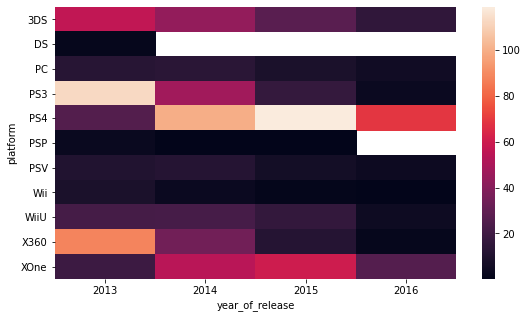

In [27]:
# Выявим лидирующие по продажам платформы
# С поморщью тепловой карты определим динамику продаж платформ по годам

df_fores_pivot = df_fores.pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum')
plt.figure(figsize=(9, 5))
heatmap = sns.heatmap(df_fores_pivot)
heatmap.set_title=('platform_sales')
plt.show()

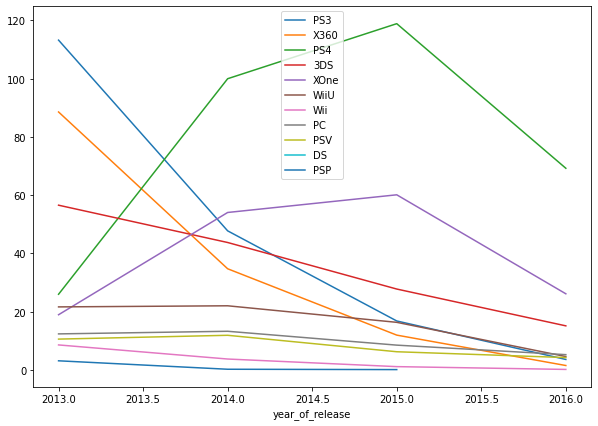

In [28]:
# График продаж
platform_list_top = df_fores['platform'].unique()
for i in platform_list_top:
    df_fores.loc[df_fores['platform'] == i].groupby('year_of_release')['all_sales'].sum().plot(legend={i}, figsize=(10, 7)).legend(platform_list_top)

График `heatmap` показал, что по состоянию на 2016 год, потенциально прибыльными являются платформы `PS4` и `XOne`. Также «темной лошадкой» можно считать платформу `WiiU` – на момент 2016 года нет четкого поднимания, будет она приказывать рост или нет. Однако, ее также можно считать потенциально перспективной.

Построим диаграмму размаха для всех платформ за период и для двух наиболее перспективных

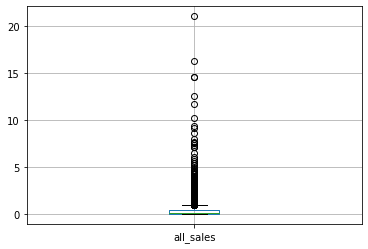

In [29]:
# Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам
# Без ограничений по оси OY
df_fores.loc[:, ['platform', 'all_sales']].boxplot()
plt.show()

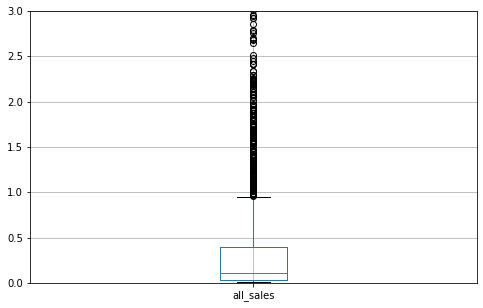

In [30]:
# В связи с значительными выбросами, введем оганичения по оси OY
plt.figure(figsize=(8, 5))
plt.ylim(0, 3)
df_fores.loc[:, ['platform', 'all_sales']].boxplot()
plt.show()

Построим диаграмму размаха для двух самых **актуальных** платформ за уточненный период

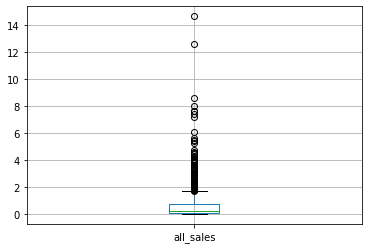

In [31]:
# Диаграмма размаха по глобальным продажам игр в разбивке по платформам
#  Для двух наиболее перпективных платформ 
#  Без ограничений по оси OY
platform_short = ['PS4', 'XOne']
df_fores_short = df_fores.query('platform in @platform_short')
df_fores_short.loc[:, ['platform', 'all_sales']].boxplot()
plt.show()

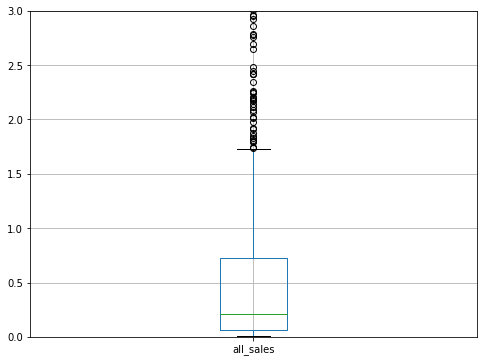

In [32]:
# В связи с значительными выбросами, введем оганичения по оси OY
plt.figure(figsize=(8, 6))
plt.ylim(0, 3)
df_fores_short.loc[:, ['platform', 'all_sales']].boxplot()
plt.show()

In [33]:
# Рассчитаем основные показатели графика
min_df = round(df_fores_short.loc[:, ['platform', 'all_sales']]['all_sales'].min(), 2)
max_df = round(df_fores_short.loc[:, ['platform', 'all_sales']]['all_sales'].max(), 2)
q1 = df_fores_short.loc[:, ['platform', 'all_sales']]['all_sales'].quantile(0.25)
med = round(df_fores_short.loc[:, ['platform', 'all_sales']]['all_sales'].median(), 2)
q3 = df_fores_short.loc[:, ['platform', 'all_sales']]['all_sales'].quantile(0.75)
iqr = q3-q1
low  = round(q1-1.5*iqr, 3)
high = round(q3+1.5*iqr, 3)

print('min =', min_df)
print('q1 =', q1)
print('median =', med)
print('q3 =', q3)
print('high =', high)
print('max =', max_df)

df_fores_high = df_fores_short.loc[:, ['platform', 'year_of_release', 'all_sales']]
df_fores_high = df_fores_high.query('all_sales > @high')

print('Исходное количество значений', df_fores.shape[0])
print('Количество значений больше верхнего размаха', df_fores_high.shape[0])
print(f'Доля больших значений {df_fores_high.shape[0] / df_fores.shape[0]:.2%}')

min = 0.01
q1 = 0.060000000000000005
median = 0.21
q3 = 0.73
high = 1.735
max = 14.63
Исходное количество значений 2233
Количество значений больше верхнего размаха 79
Доля больших значений 3.54%


Диаграмма размаха показала очень сильный разброс данных, несмотря на то, что для ее построения был взят период с наибольшими объемами проданных копий и наиболее актуальные платформы. Медианное значение графика составляет 21 тыс. копий в год, при том, что максимальное – более 14.6 млн. копий.

Значение первого квартиля составляет 6 тыс. копий в год, значение третьего квартиля – 73 тыс. копий в год. С учетом медианного значения 21 тыс., можно говорить, о том, что подавляющее большинство игр обеих платформ имеют крайне незначительные годовые продажи. 

Значимые продажи, за рамками верхнего размаха (79 копий в год), составляют немногим больше 3.5%.  Это может говорить о значимой волатильности продаж игр даже на актуальных платформах, что может быть следствием сочетания высокого уровня конкуренции рынка, ошибок прогнозирования и отбора продукта, нестабильности продукта и пр.


### Анализ влияния оценок <a id='3.5'></a>

- Выявить зависимость влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы.
- Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.
- Соотнести выводы с продажами игр на других платформах

In [34]:
# Сделаем срез с непустыми значениями оценоки
df_PS4 = df.dropna(subset=['critic_score', 'user_score'])

# Сделаем срез по самой популярной платформе - PS4
df_PS4 = df_PS4.loc[df_PS4['platform'] == 'PS4']
display(df_PS4.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


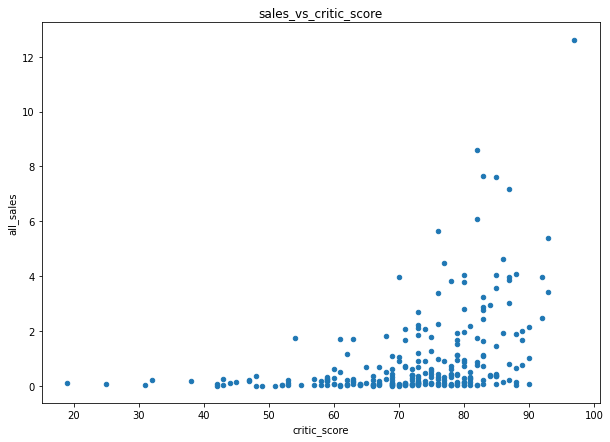

Коэффициент корреляции продаж от оценок критиков составляет 0.4059


In [35]:
# Построим диаграмму рассеяния зависимости оценок критиков и продажами
df_PS4.plot(kind='scatter', x='critic_score', y='all_sales', title='sales_vs_critic_score', figsize=(10, 7))
plt.show()

# Посчитаем корреляцию между оценками критиков и продажами
print('Коэффициент корреляции продаж от оценок критиков составляет', round(df_PS4['critic_score'].corr(df_PS4['all_sales']), 4))

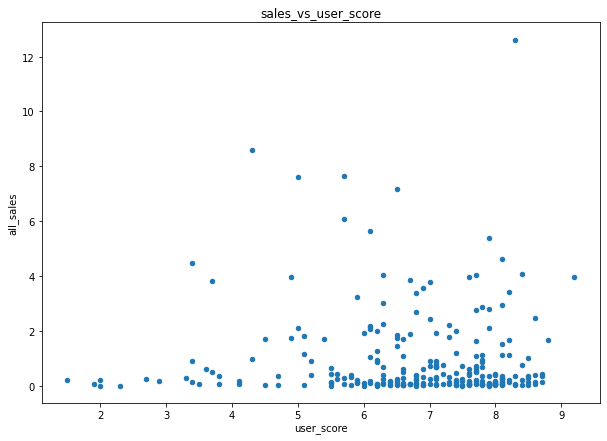

Коэффициент корреляции продаж от отзывов пользователей составляет -0.0336


In [36]:
# Построим диаграмму рассеяния зависимости отзывами пользователей и продажами
df_PS4.plot(kind='scatter', x='user_score', y='all_sales', title='sales_vs_user_score', figsize=(10, 7))
plt.show()

# Посчитаем корреляцию между отзывами пользователей и продажами
print('Коэффициент корреляции продаж от отзывов пользователей составляет', round(df_PS4['all_sales'].corr(df_PS4['user_score']), 4))

Для определения степени влияния оценок критиков и отзывов пользователей на продажи был произведен срез с непустыми значениями оценок и отзывов. Для выявления зависимости была принята наиболее популярная платформа - `PS4`

Анализ не выявил зависимости объема продаж ни от оценок критиков (коэффициент корреляции продаж от оценок критиков составляет 0.4059), ни от отзывов пользователей (коэффициент корреляции продаж от отзывов пользователей составляет -0.0336). 

Данный результат позволяет сделать вывод о том, что на продажи не влияют ни оценки критиков, ни отзывы пользователей. 

### Анализ жанров <a id='3.6'></a>

- Обозначить общее распределение игр по жанрам.
- Выявить наиболее прибыльные жанры.
- Соотнести популярность жанров с их продажами

genre
Action          766
Adventure       245
Fighting         80
Misc            155
Platform         74
Puzzle           17
Racing           85
Role-Playing    292
Shooter         187
Simulation       62
Sports          214
Strategy         56
Name: name, dtype: int64

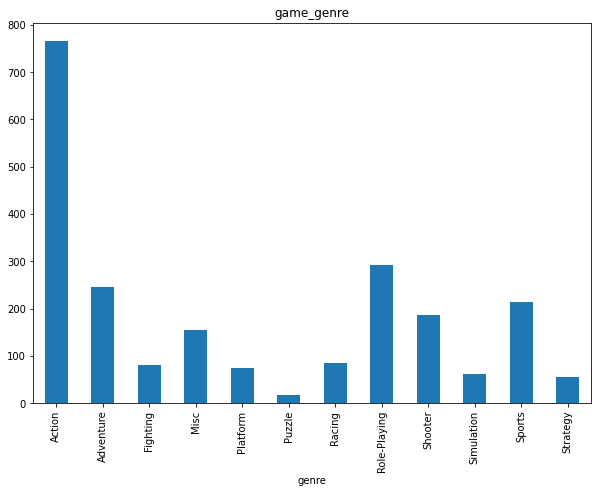

In [37]:
# Выявим количество игр в каждом жанре
df_fores_genre = df_fores.groupby('genre')['name'].count()
display(df_fores_genre)

# Пострим график
df_fores_genre.plot(kind='bar', title='game_genre', figsize=(10, 7))
plt.show()

genre
Action          321.87
Adventure        23.64
Fighting         35.31
Misc             62.82
Platform         42.63
Puzzle            3.17
Racing           39.89
Role-Playing    145.89
Shooter         232.98
Simulation       21.76
Sports          150.65
Strategy         10.08
Name: all_sales, dtype: float64

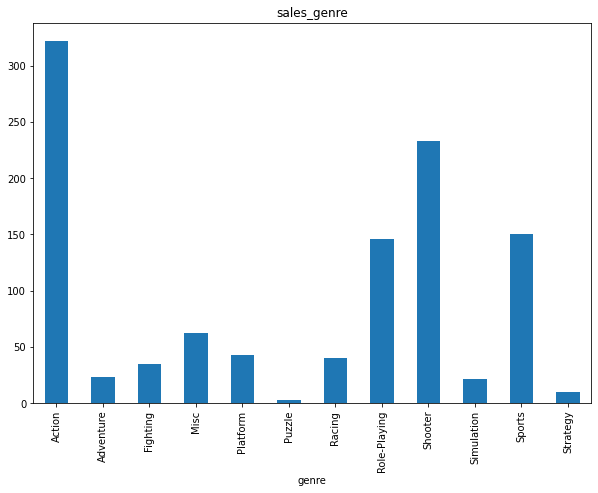

In [38]:
# Определим объем продаж в каждом жанре
df_fores_sales_genre = df_fores.groupby('genre')['all_sales'].sum()
display(df_fores_sales_genre)

# Пострим грвфик
df_fores_sales_genre.plot(kind='bar', title='sales_genre', figsize=(10, 7))
plt.show()

,name_count,all_sales_sum
genre,,
Action,766,321.87
Adventure,245,23.64
Fighting,80,35.31
Misc,155,62.82
Platform,74,42.63
Puzzle,17,3.17
Racing,85,39.89
Role-Playing,292,145.89
Shooter,187,232.98


Коэффициент корреляции составляет 0.8417


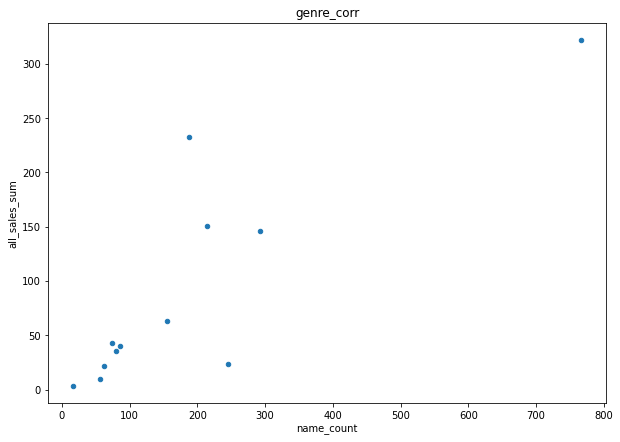

In [39]:
# Соотнесем популярность жанров с их продажами
# Сгруппируем жанры и определим по каждому жанру его частотность и продажи
df_fores_corr = df_fores.groupby('genre').agg({'name': ['count'], 'all_sales': ['sum']})
df_fores_corr.columns=['name_count', 'all_sales_sum']
display(df_fores_corr)

# Корреляция продаж по жанрам от количекство игр по жанрам
k_fores_corr = df_fores_corr['name_count'].corr(df_fores_corr['all_sales_sum'])
print(f'Коэффициент корреляции составляет {k_fores_corr:.4f}')

# Постриим график методом scatter
df_fores_corr.plot(kind='scatter', x='name_count', y='all_sales_sum', title='genre_corr', figsize=(10, 7))
plt.show()

Группировка жанров по количеству игр показала, что наиболее популярным (с наибольшим количеством игр) является жанр `Action` – 766 игр. На втором месте по популярности с сильным отстававшим `Role-Playing` – 292 игры. 

Группировка жанров по объему продаж показала, что лидирует также `Action` – 321.87 млн. копий, на втором месте жанр `Shooter` – 232.98 млн. копий.

Соотнесение популярности жанров с объемами их продаж показало значимый уровень корреляции - 0.8417. Это наглядно показано на графике рассеивания.

### Общие выводы по исследовательскому анализу <a id='3f'></a>

platform,PS4,WiiU,XOne
genre,,,
Action,96.10,14.75,37.31
Adventure,6.34,0.17,2.68
Fighting,8.65,6.09,2.45
Misc,8.19,7.38,7.43
Platform,7.69,16.27,0.93
Puzzle,0.02,1.32,NaN
Racing,12.14,7.36,9.79
Role-Playing,28.99,1.93,10.55
Shooter,88.56,5.48,60.33


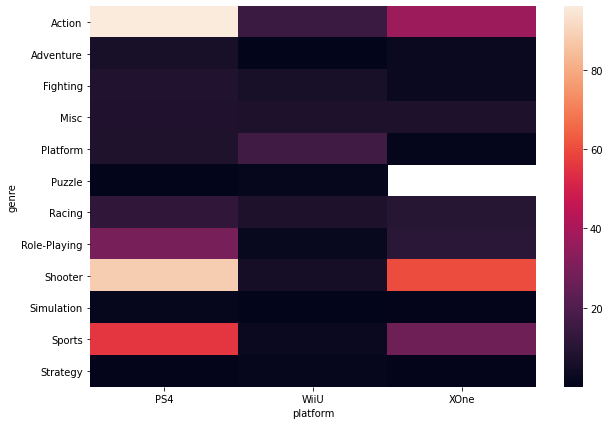

In [40]:
# Определим наиболее перспективные направления
platf_top = ['PS4', 'XOne', 'WiiU']
df_fores_pr = df_fores.query('platform in @platf_top')
df_fores_pr_pivot = df_fores_pr.pivot_table(index='genre', columns='platform', values='all_sales', aggfunc='sum')
display(df_fores_pr_pivot)

# Построим график методом heatmap
plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(df_fores_pr_pivot)
heatmap.set_title=('platform_top')
plt.show()

Проведенный анализ общих продаж платформ показал, что наибольшие продажи происходили в период с 2002 по 2011 годы. Однако, для прогнозирования продаж на 2017 год этот период не подходит в связи с коротким жизненным циклом платформ. 

Анализ платформ показал, что срок их жизненного цикла составляет 7 лет. Максимальных продаж платформа достигает через 3.5-3.8 лет.

Таким образом, для прогнозирования пика продаж, необходимо принять ретроспективный период равный 4 годам – с 2013 по 2016 гг.

Анализ динамики продаж показал, что по состоянию на 2016 год, потенциально прибыльными являются платформы `PS4` и `XOne`. Также «темной лошадкой» можно считать платформу `WiiU` – на момент 2016 года нет четкого поднимания, будет она приказывать рост или нет. Однако, ее также можно считать потенциально перспективной.

Исследование диаграммы размаха за актульный период показало очень сильный разброс данных, несмотря на то, что для ее построения был взят период с наибольшими объемами проданных копий. Значение первого квартиля составляет 6 тыс. копий в год, значение третьего квартиля – 73 тыс. копий в год. С учетом медианного значения 21 тыс., можно говорить, о том, что подавляющее большинство игр обеих платформ имеют крайне незначительные годовые продажи.

В тоже время, 3,5% продаж находятся за рамками верхнего размаха (79 копий в год). Это может говорить о значимой волатильности продаж игр даже на актуальных платформах, что может быть следствием сочетания высокого уровня конкуренции рынка, ошибок прогнозирования и отбора продукта, нестабильности продукта и пр.

Анализ влияния на уровень продаж оценок и отзывов, на примере наиболее популярной платформы - `PS4` показал то, что на продажи не влияют ни оценки критиков, ни отзывы пользователей.

Анализ жанров показал, что при группировке жанров по количеству игр, наиболее популярным является жанр `Action`. На втором месте по популярности с сильным отстававшим `Role-Playing`. Группировка жанров по объему продаж показала, что лидирует также `Action`, а на втором месте жанр `Shooter`. Соотнесение популярности жанров с объемами их продаж показало значимый уровень корреляции - 0.8417.

Учитывая все сказанное выше, можно сделать вывод о том, что наиболее эффективным будет в 2017 году акцент на три платформы^
`PS4`, `WiiU`, `XOne` по следующим жанрам: `Action`, `Role-Playing`, `Shooter`

## Составление портрета пользователя каждого региона <a id='4'></a>

1. Определить пять наиболее продаваемых платформ и пять наиболее продаваемых жанров в разрезе по регионам
2. Определить продаваемость игр каждой возрастной категории по регионам
3. Определить пять наиболее продаваемых платформ и пять наиболее продаваемых жанров в разрезе по регионам для каждой возрастной категории
4. Выявить влияние рейтинга ESRB на продажи в каждом регионе

### Определение пяти наиболее продаваемых платформ и жанров в разрезе по регионам <a id='4.1'></a>

In [41]:
# Создадим списки рейтингов платформ
platform_na_sales =list(df_fores.groupby('platform')['na_sales'].sum().sort_values(ascending=False).index[0:5])
platform_eu_sales = list(df_fores.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).index[0:5])
platform_jp_sales = list(df_fores.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).index[0:5])
platform_other_sales = list(df_fores.groupby('platform')['other_sales'].sum().sort_values(ascending=False).index[0:5])

# Создадим списки рейтингов жанров
genre_na_sales = list(df_fores.groupby('genre')['na_sales'].sum().sort_values(ascending=False).index[0:5])
genre_eu_sales = list(df_fores.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).index[0:5])
genre_jp_sales = list(df_fores.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).index[0:5])
genre_other_sales = list(df_fores.groupby('genre')['other_sales'].sum().sort_values(ascending=False).index[0:5])

In [42]:
# Определим пять наиболее продаваемых платформ и жанров в разрезе по регионам
top_sales = pd.DataFrame({
    'indicator': ['1', '2', '3', '4', '5'], 
    'platform_na': platform_na_sales, 
    'platform_eu': platform_eu_sales,
    'platform_jp': platform_jp_sales,
    'platform_other': platform_other_sales,
    'genre_na': genre_na_sales,
    'genre_eu': genre_eu_sales,
    'genre_jp': genre_jp_sales,
    'genre_other': genre_other_sales
})
display(top_sales)

,indicator,platform_na,platform_eu,platform_jp,platform_other,genre_na,genre_eu,genre_jp,genre_other
0,1,PS4,PS4,3DS,PS4,Action,Action,Role-Playing,Action
1,2,XOne,PS3,PS3,PS3,Shooter,Shooter,Action,Shooter
2,3,X360,XOne,PSV,XOne,Sports,Sports,Misc,Sports
3,4,PS3,X360,PS4,X360,Role-Playing,Role-Playing,Fighting,Role-Playing
4,5,3DS,3DS,WiiU,3DS,Misc,Racing,Shooter,Misc


### Определение продаваемости игр каждой возрастной категории по регионам <a id='4.2'></a>

In [43]:
# Сформируем таблицу продаваемости игр каждой возрастной категории
print(df_fores.groupby('rating')['all_sales'].sum().sort_values(ascending=False))

rating
M       371.68
not     276.84
E       200.16
T       126.62
E10+    115.39
Name: all_sales, dtype: float64


,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
E,79.05,83.36,15.14,22.61
E10+,54.24,42.69,5.89,12.57
M,165.21,145.32,14.11,47.04
T,49.79,41.95,20.59,14.29
not,89.42,78.91,85.05,23.46


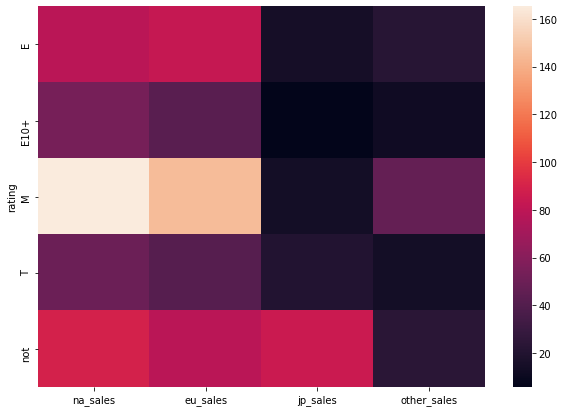

In [44]:
# Сформируем таблицу продаваемости игр каждой возрастной категории по регионам
df_sale_rating = df_fores.groupby('rating').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum', 'other_sales': 'sum'})
display(df_sale_rating)

# Потроим графмк методом heatmap
plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(df_sale_rating)
heatmap.slim_title = 'sale_rating'
plt.show()

Наиболее продаваемы игры в возрастных категориях `E`, `T` и `M` (категорию `not` не рассматриваем, поскольку мы не знаем к какой возрастной группе она принадлежит)

В разрезах регионов можно сказать, что интерес представляет в Северной Америке и Европе - `E`, `M`. По Японии явное лидерство у категории `not`, что может быть связано с отсутствием требования присваивать категорию, либо со слишком длительными процедурами. По другим странам продажи крайне низкие.

Тем не менее, для формирования портрета потребителя в каждом регионе, необходимо сделать срезы указанных возрастных категорий по всем регионам

### Определение пяти наиболее продаваемых платформ и жанров в разрезе по регионам для каждой возрастной категории <a id='4.3'></a>

In [45]:
# Создадим списки рейтингов платформ для Северной Америки
e_platform_na_sales =list(df_fores.loc[df['rating']=='E'].groupby('platform')['na_sales'].sum().sort_values(ascending=False).index[0:5])
t_platform_na_sales =list(df_fores.loc[df['rating']=='T'].groupby('platform')['na_sales'].sum().sort_values(ascending=False).index[0:5])
m_platform_na_sales =list(df_fores.loc[df['rating']=='M'].groupby('platform')['na_sales'].sum().sort_values(ascending=False).index[0:5])

# Создадим списки жанров платформ для Северной Америки
e_genre_na_sales =list(df_fores.loc[df['rating']=='E'].groupby('genre')['na_sales'].sum().sort_values(ascending=False).index[0:5])
t_genre_na_sales =list(df_fores.loc[df['rating']=='T'].groupby('genre')['na_sales'].sum().sort_values(ascending=False).index[0:5])
m_genre_na_sales =list(df_fores.loc[df['rating']=='M'].groupby('genre')['na_sales'].sum().sort_values(ascending=False).index[0:5])

# Определим пять наиболее продаваемых платформ и жанров за 2013-2016 гг в разрезе по регионам
top_sales_na = pd.DataFrame({
    'indicator': ['1', '2', '3', '4', '5'], 
    'e_platf_na': e_platform_na_sales, 
    't_platf_na': t_platform_na_sales,
    'm_platf_na': m_platform_na_sales,
    'e_genre_na': e_genre_na_sales,
    't_genre_na': t_genre_na_sales,
    'm_genre_na': m_genre_na_sales,
})
display(top_sales_na)

,indicator,e_platf_na,t_platf_na,m_platf_na,e_genre_na,t_genre_na,m_genre_na
0,1,PS4,PS4,XOne,Sports,Shooter,Action
1,2,XOne,XOne,PS4,Platform,Action,Shooter
2,3,X360,PS3,X360,Racing,Role-Playing,Role-Playing
3,4,WiiU,X360,PS3,Action,Sports,Adventure
4,5,PS3,PC,PC,Misc,Fighting,Fighting


In [46]:
# Создадим списки рейтингов платформ для Европы
e_platform_eu_sales =list(df_fores.loc[df['rating']=='E'].groupby('platform')['eu_sales'].sum().sort_values(ascending=False).index[0:5])
t_platform_eu_sales =list(df_fores.loc[df['rating']=='T'].groupby('platform')['eu_sales'].sum().sort_values(ascending=False).index[0:5])
m_platform_eu_sales =list(df_fores.loc[df['rating']=='M'].groupby('platform')['eu_sales'].sum().sort_values(ascending=False).index[0:5])

# Создадим списки жанров платформ для Европы
e_genre_eu_sales =list(df_fores.loc[df['rating']=='E'].groupby('genre')['eu_sales'].sum().sort_values(ascending=False).index[0:5])
t_genre_eu_sales =list(df_fores.loc[df['rating']=='T'].groupby('genre')['eu_sales'].sum().sort_values(ascending=False).index[0:5])
m_genre_eu_sales =list(df_fores.loc[df['rating']=='M'].groupby('genre')['eu_sales'].sum().sort_values(ascending=False).index[0:5])

# Определим пять наиболее продаваемых платформ и жанров в разрезе по регионам
top_sales_eu = pd.DataFrame({
    'indicator': ['1', '2', '3', '4', '5'], 
    'e_platf_eu': e_platform_eu_sales, 
    't_platf_eu': t_platform_eu_sales,
    'm_platf_eu': m_platform_eu_sales,
    'e_genre_eu': e_genre_eu_sales,
    't_genre_eu': t_genre_eu_sales,
    'm_genre_eu': m_genre_eu_sales,
})
display(top_sales_eu)

,indicator,e_platf_eu,t_platf_eu,m_platf_eu,e_genre_eu,t_genre_eu,m_genre_eu
0,1,PS4,PS4,PS4,Sports,Shooter,Action
1,2,PS3,PS3,PS3,Racing,Action,Shooter
2,3,XOne,PC,XOne,Platform,Sports,Role-Playing
3,4,WiiU,XOne,X360,Action,Fighting,Adventure
4,5,X360,X360,PC,Simulation,Role-Playing,Fighting


In [47]:
# Создадим списки рейтингов платформ для Японии
e_platform_jp_sales =list(df_fores.loc[df['rating']=='E'].groupby('platform')['jp_sales'].sum().sort_values(ascending=False).index[0:5])
t_platform_jp_sales =list(df_fores.loc[df['rating']=='T'].groupby('platform')['jp_sales'].sum().sort_values(ascending=False).index[0:5])
m_platform_jp_sales =list(df_fores.loc[df['rating']=='M'].groupby('platform')['jp_sales'].sum().sort_values(ascending=False).index[0:5])
# Создадим списки жанров платформ для Японии
e_genre_jp_sales =list(df_fores.loc[df['rating']=='E'].groupby('genre')['jp_sales'].sum().sort_values(ascending=False).index[0:5])
t_genre_jp_sales =list(df_fores.loc[df['rating']=='T'].groupby('genre')['jp_sales'].sum().sort_values(ascending=False).index[0:5])
m_genre_jp_sales =list(df_fores.loc[df['rating']=='M'].groupby('genre')['jp_sales'].sum().sort_values(ascending=False).index[0:5])

# Определим пять наиболее продаваемых платформ и жанров в разрезе по регионам
top_sales_jp = pd.DataFrame({
    'indicator': ['1', '2', '3', '4', '5'], 
    'e_platf_jp': e_platform_jp_sales, 
    't_platf_jp': t_platform_jp_sales,
    'm_platf_jp': m_platform_jp_sales,
    'e_genre_jp': e_genre_jp_sales,
    't_genre_jp': t_genre_jp_sales,
    'm_genre_jp': m_genre_jp_sales,
})
display(top_sales_jp)

,indicator,e_platf_jp,t_platf_jp,m_platf_jp,e_genre_jp,t_genre_jp,m_genre_jp
0,1,3DS,PS3,PS3,Platform,Role-Playing,Action
1,2,WiiU,PSV,PS4,Action,Action,Shooter
2,3,PS3,3DS,PSV,Sports,Fighting,Role-Playing
3,4,PS4,PS4,3DS,Misc,Misc,Adventure
4,5,PSP,WiiU,X360,Racing,Shooter,Misc


In [48]:
# Создадим списки рейтингов платформ для Других стран
e_platform_other_sales =list(df_fores.loc[df['rating']=='E'].groupby('platform')['other_sales'].sum().sort_values(ascending=False).index[0:5])
t_platform_other_sales =list(df_fores.loc[df['rating']=='T'].groupby('platform')['other_sales'].sum().sort_values(ascending=False).index[0:5])
m_platform_other_sales =list(df_fores.loc[df['rating']=='M'].groupby('platform')['other_sales'].sum().sort_values(ascending=False).index[0:5])
# Создадим списки жанров платформ для Других стран
e_genre_other_sales =list(df_fores.loc[df['rating']=='E'].groupby('genre')['other_sales'].sum().sort_values(ascending=False).index[0:5])
t_genre_other_sales =list(df_fores.loc[df['rating']=='T'].groupby('genre')['other_sales'].sum().sort_values(ascending=False).index[0:5])
m_genre_other_sales =list(df_fores.loc[df['rating']=='M'].groupby('genre')['other_sales'].sum().sort_values(ascending=False).index[0:5])

# Определим пять наиболее продаваемых платформ и жанров в разрезе по регионам
top_sales_other = pd.DataFrame({
    'indicator': ['1', '2', '3', '4', '5'], 
    'e_platf_other': e_platform_other_sales, 
    't_platf_other': t_platform_other_sales,
    'm_platf_other': m_platform_other_sales,
    'e_genre_other': e_genre_other_sales,
    't_genre_other': t_genre_other_sales,
    'm_genre_other': m_genre_other_sales,
})
display(top_sales_other)

,indicator,e_platf_other,t_platf_other,m_platf_other,e_genre_other,t_genre_other,m_genre_other
0,1,PS4,PS4,PS4,Sports,Shooter,Action
1,2,PS3,PS3,PS3,Racing,Action,Shooter
2,3,XOne,XOne,XOne,Platform,Role-Playing,Role-Playing
3,4,X360,X360,X360,Action,Sports,Adventure
4,5,WiiU,PSV,PC,Misc,Fighting,Fighting


### Выявление влияния рейтинга ESRB на продажи в каждом регионе <a id='4.4'></a>

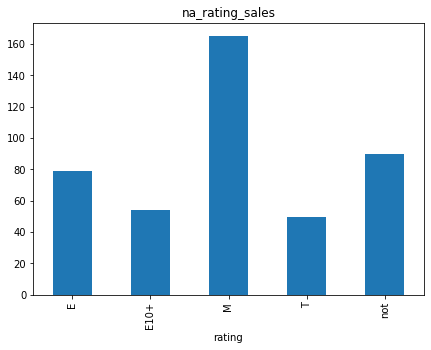

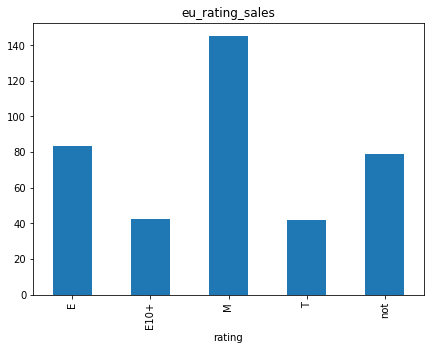

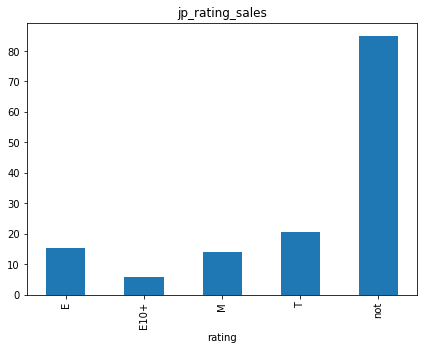

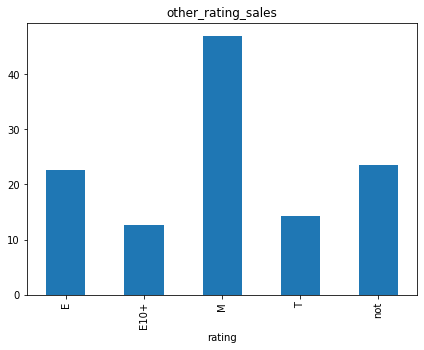

In [49]:
# Пострим графики продаж по рейтингам
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
name_title = ['na_rating_sales', 'eu_rating_sales', 'jp_rating_sales', 'other_rating_sales']

for i in range(len(regions)):
    df_sale_rating[f'{regions[i]}'].plot(kind='bar', title=name_title[i], figsize=(7, 5))
    plt.show()

### Общие выводы по составлению портрета пользователя <a id='4f'></a>

По результатам анализа пяти наиболее продаваемых платформ в рамках актуального периода по регионам, можно сделать вывод, что структура потребления в Северной Америке очень похожа на структуру потребления в Европе. Все пять строк (в разном порядке), как на американском рынке, так и на европейском занимают платформы `PS4` `XOne`, `X360`, `PS3`, `3DS`. В тоже время, на японском рынке в продажах лидирует платформа `3DS`– которая замыкает «топ 5» лидеров продаж американского и европейского рынка. Кроме того, в «топ 5» лидеров продаж японского рынка водят платформы `PSV` и `WiiU` – которые вообще не являются в лидерах на других рынках.

Таким образом, у американских и европейских пользователей схожие предпочтения относительно игровых платформ. Японские пользователи чаще предпочитают другие платформы (`3DS `, `PSV` и `WiiU` ) не пользующиеся популярностью в остальных регионах.

Относительно жанров ситуация схожая. Как и в платформах американские и европейские потребители предпочитают `Action`, `Sports`, `Shooter`, `Role-Playing`. Далее начинаются различия: американцы предпочитают `Misc`, а европейцы – `Racing`. В Японии, как и в Америке с Европой в топ-5 предпочтений входят `Action`, `Shooter`. Но лидирует у японцев жанр `Role-Playing`. Кроме того, в Японии в лидеры не попал жанр `Sports`, но вместо этого в топ-5 вошел жанр `Fighting`.

Т.о., при очевидной схожести потребления игр как в разрезе по платформам, так и по жанрам есть отличия лидеров на японском рынке. Японцы, в отличии от американцев с европейчами, предпочитают игры жанра `Role-Playing` на платформе `3DS`. Кроме того, вместо жанра `Sports`, в Японии предпочитают жанр `Fighting`.

В разрезе категорий, по всем регионам, основные продажи приходятся на `M` (взрослые), `E` (для всех), `T` (подростки). В региональном разрезе, если на американском и европейском рынках одинаковая ситуация – лидирует категория `М`, а за ней идет `E`,  то в Японии основные продажи приходятся на категорию `not`.

Учитывая жанровую особенность, можно говорить о том, что в Японии в меньшей степени склонны к жестким жанрам для взрослой категории, отдавая предпочтение более гуманным жанрам для подростков или без возрастных ограничений. 

На американском рынке в категории для всех потребители предпочитают `Sports` на платформе `PS4`, подростки – ` Shooter ` на ` PS4`, взрослые – Action  на ` XOne`. В Европе точно такие же предпочтения, с той лишь разницей, что взрослые предпочитают платформу `PS4`.

Совершенно иные жанровые предпочтения в Японии. В категории для всех японцы предпочитают `Platform` на платформе ` 3DS`, подростки – `Role-Playing` на `PS3`, взрослые – `Action` на `PS3`.

Анализ влияния рейтинга показал, что категория `M` (для взрослых) имеет значительно более высокий уровень продаж на любом рынке (кроме японского), относительно остальных категорий. То есть, чем выше охват взрослой аудитории, тем выше вероятность роста объема продаж. Остальные категории имеют сбыт, соотносящийся с региональными предпочтениями, и не имеют прямого влияния на продажи.

Таким образом, для увеличения продаж необходимо предлагать игры для максимально широкого круга потребителей, в первую очередь, в категории `М`, далее в категории `Е` и без указания категорий `not`

## Проверка гипотез <a id='5'></a>

1. Проверить гипотезу о сопоставимости средних пользовательских рейтингов платформ XOne и PC
2. Проверить гипотезу о сопоставимости средних пользовательских рейтингов жанров Action и Sports

### Проверка гипотезы о сопоставимости средних пользовательских рейтингов платформ XOne и PC <a id='5.1'></a>

In [50]:
# Проверим гипотезу о сопоставимости средних пользовательских рейтингов платформ XOne и PC 
hip_1_0 = 'Нет ни какого различия между средними пользовательскими рейтингами платформ XOne и PC'
hip_1_a = 'Существуют различия между средними пользовательскими рейтингами платформ XOne и PC'

ser_1 = df_fores.loc[(df_fores['platform'] == 'XOne') & (df_fores['user_score'].isna() == False), 'user_score']
ser_2 = df_fores.loc[(df_fores['platform'] == 'PC') & (df_fores['user_score'].isna() == False), 'user_score']

alpha = .05 # если p-value окажется меньше него - отвегнем нулевую гипотезу
results = st.ttest_ind(ser_1, ser_2, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue > alpha:
    print('Принимаем нулевую гипотезу:', hip_1_0)
else:
    print('Ответгаем нулевую гипотезу:', hip_1_a) 

p-значение: 0.14759594013430463
Принимаем нулевую гипотезу: Нет ни какого различия между средними пользовательскими рейтингами платформ XOne и PC


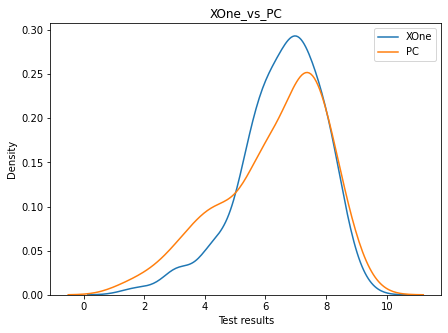

In [51]:
# Визуализируем проверку гипотезы о сопоставимости средних пользовательских рейтингов платформ XOne и PC 
plt.figure(figsize=(7, 5))
sns.kdeplot(data=ser_1, label='XOne')
sns.kdeplot(data=ser_2, label='PC')
plt.xlabel("Test results")
plt.title('XOne_vs_PC')
plt.legend()
plt.show()

### Проверка гипотезы о сопоставимости средних пользовательских рейтингов жанров Action и Sports <a id='5.2'></a>

In [52]:
# Проверим гипотезу о сопоставимости средних пользовательских рейтингов жанров Action и Sports
hip_2_0 = 'Нет ни какого различия между средними пользовательскими рейтингами жанров Action и Sports'
hip_2_a = 'Существуют различия между средними пользовательскими рейтингами жанров Action и Sports'

ser_3 = df_fores.loc[(df_fores['genre'] == 'Action') & (df_fores['user_score'].isna() == False), 'user_score']
ser_4 = df_fores.loc[(df_fores['genre'] == 'Sports') & (df_fores['user_score'].isna() == False), 'user_score']

alpha = .05 # если p-value окажется меньше него - отвегнем нулевую гипотезу
results = st.ttest_ind(ser_3, ser_4, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue > alpha:
    print('Принимаем нулевую гипотезу:', hip_2_0)
else:
    print('Ответгаем нулевую гипотезу:', hip_2_a)

p-значение: 1.4460039700704315e-20
Ответгаем нулевую гипотезу: Существуют различия между средними пользовательскими рейтингами жанров Action и Sports


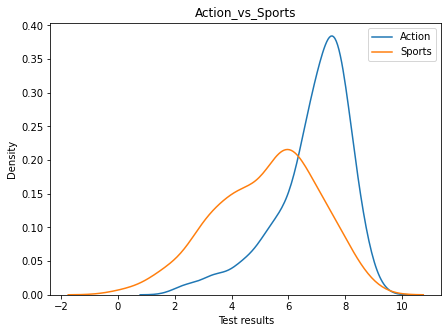

In [53]:
# Визуализируем проверку гипотезы о сопоставимости средних пользовательских рейтингов жанров Action и Sports
plt.figure(figsize=(7, 5))
sns.kdeplot(data=ser_3, label='Action')
sns.kdeplot(data=ser_4, label='Sports')
plt.xlabel("Test results")
plt.title('Action_vs_Sports')
plt.legend()
plt.show()

### Общие выводы по проверке гипотез <a id='5f'></a>

Для уточнения различий между платформами `XOne` и `PC`, была сформулирована статистическая гипотеза о сопоставимости по ним средних пользовательских оценок. Сравнительный параметр для оценки р-значения был выбран 0,05. В результате не выявлено различий в пользовательских оценках по этим платформам.

Для уточнения различий между жанрами `Action` и `Sports`, также была сформулирована статистическая гипотеза о сопоставимости по ним средних пользовательских оценок. Сравнительный параметр для оценки р-значения был выбран 0,05. В результате отвеогнута нулевая гипотеза и сопоставимость пользовательских оценок по этим жанрам не подтверждена.

Следовательно, можно предположить, что жанры имеют более существенные различия в представлениях пользователей, нежели платформы. Это может быть объяснено высокой волатильности продаж платформ, как следствие множественности факторов, влияющих на восприятие платформы пользователем. Для жанров напротив, крайне важны пользовательские предпочтения и их оценки

## Общие выводы <a id='6'></a>

Однако, для прогнозирования продаж на 2017 год этот период не подходит в связи с коротким жизненным циклом платформ.

Анализ платформ показал, что срок их жизненного цикла составляет 7 лет. Максимальных продаж платформа достигает через 3.5-3.8 лет. 

Таким образом, для прогнозирования пика продаж, необходимо принять ретроспективный период равный 4 годам – с 2013 по 2016 гг.

Анализ динамики продаж показал, что по состоянию на 2016 год, потенциально прибыльными являются платформы `PS4` и `XOne`. Также «темной лошадкой» можно считать платформу `WiiU` – на момент 2016 года нет четкого поднимания, будет она приказывать рост или нет. Однако, ее также можно считать потенциально перспективной.

Подавляющее большинство платформ имеют крайне незначительные годовые продажи. В тоже время, 3,5% продаж показывают аномально высокие результаты, что может говорить о довольно значимой волатильности продаж платформ, что может быть следствием сочетания высокого уровня конкуренции рынка, ошибок прогнозирования и отбора продукта, нестабильности продукта и пр. Такое положение дел показывает важность развития платформ на базе более точных прогнозов.

Также надо отметить, что анализ влияния на уровень продаж оценок и отзывов, на примере наиболее популярной платформы - `PS4` показал то, что на продажи не влияют ни оценки критиков, ни отзывы пользователей.

Анализ жанров показал, что при группировке жанров по количеству игр, наиболее популярным является жанр `Action`. На втором месте по популярности с сильным отстававшим `Role-Playing`. Группировка жанров по объему продаж показала, что лидирует также `Action`, а на втором месте жанр `Shooter`. Соотнесение популярности жанров с объемами их продаж показало значимый уровень корреляции - 0.8417.

Учитывая все сказанное выше, можно сделать вывод о том, что наиболее эффективным будет в 2017 году акцент на три платформы^ `PS4`, `WiiU`, `XOne` по следующим жанрам: `Action`, `Role-Playing`, `Shooter`

По результатам анализа пяти наиболее продаваемых платформ по регионам, можно сделать вывод, что структура потребления в Северной Америке очень похожа на структуру потребления в Европе –  `PS4` `XOne`, `X360`, `PS3`, `3DS`. В тоже время, на японском рынке в продажах лидирует платформа `3DS` – которая замыкает «топ 5» лидеров продаж американского и европейского рынка. Кроме того, в «топ 5» лидеров продаж японского рынка водят платформы `PSV` и `WiiU` – которые вообще не являются в лидерах на других рынках.

Относительно жанров ситуация схожая. Как и в платформах американские и европейские потребители предпочитают `Action`, `Sports`, `Shooter`, `Role-Playing`. В Японии хотя и входят в топ-5 предпочтений `Action`, `Shooter`, но лидирует жанр `Role-Playing`. Кроме того, в Японии в лидеры не попал жанр `Sports`, но вместо этого в топ-5 вошел жанр `Fighting`.

В разрезе категорий, по всем регионам, основные продажи приходятся на `M` (взрослые), `E` (для всех), `T` (подростки). В региональном разрезе, если на американском и европейском рынках одинаковая ситуация – лидирует категория `М`, а за ней идет `E`, то в Японии основные продажи приходятся на категорию `not`.

Учитывая жанровую особенность, можно говорить о том, что в Японии в меньшей степени склонны к жестким жанрам для взрослой категории, отдавая предпочтение более гуманным жанрам для подростков или без возрастных ограничений.

На американском рынке в категории для всех потребители предпочитают `Sports` на платформе `PS4`, подростки – `Shooter` на `PS4`, взрослые – `Action` на `XOne`. В Европе точно такие же предпочтения, с той лишь разницей, что взрослые предпочитают платформу `PS4`.

Совершенно иные жанровые предпочтения в Японии. В категории для всех японцы предпочитают `Platform` на платформе `3DS`, подростки – `Role-Playing` на `PS3`, взрослые – `Action` на `PS3`.

Анализ влияния рейтинга показал, что категория `M` (для взрослых) имеет значительно более высокий уровень продаж на любом рынке (кроме японского), относительно остальных категорий. То есть, чем выше охват взрослой аудитории, тем выше вероятность роста объема продаж. Остальные категории имеют сбыт, соотносящийся с региональными предпочтениями, и не имеют прямого влияния на продажи.

Таким образом, для увеличения продаж необходимо предлагать игры для максимально широкого круга потребителей, в первую очередь, в категории `М`, далее в категории `Е` и без указания категорий `not`.

Для уточнения различий между платформами `XOne` и `PC`, была сформулирована проверена и принята статистическая гипотеза о сопоставимости по ним средних пользовательских оценок. Различий между средними пользовательскими рейтингами платформ XOne и PC не выявлено. 

Для выявления различий между жанрами `Action` и `Sports`, также была сформулирована и отвергнута статистическая гипотеза, что нет ни какого различия между средними пользовательскими рейтингами жанров `Action` и `Sports`. Таким образом, существуют различия между средними пользовательскими рейтингами жанров `Action` и `Sports`.

Следовательно, можно предположить, что жанры имеют более существенные различия в представлениях пользователей, нежели платформы. Это может быть объяснено высокой волатильности продаж платформ, как следствие множественности факторов, влияющих на восприятие платформы пользователем. Для жанров напротив, крайне важны пользовательские предпочтения и их оценки.

**Резюме**

Учитывая все сказанное выше можно утверждать, что в 2017 году потенциально популярными будут платформы `PS4` и `XOne`. Для американского и европейского рынков необходимо предложить на этих платформах игры в жанрах `Action` (`Т`), `Shooter` (`М`), `Sports` (`Е`), для японского рынка – в жанрах `Platform` (`Е`), `Role-Playing` (`Т`), `Action` (`М`). В тоже время, максимально расширить предложения в категории `Е`. При продвижении основной упор сделать на жанры через формирование положительного мнения у пользователей.